In [1]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.modeling.perceptron import train_perceptron, predict_perceptron
from stanford_cs229.utils.util import load_our_data, plot, preprocess_rolling_avg, cmap
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

# Number of class for learning
K = 5
plt_counter = 0

# Load data and preprocess for K-means
raw_data = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz_extended2.csv')
raw_data = raw_data / raw_data.max()
X_tr = preprocess_rolling_avg(raw_data)
X_tr = X_tr / X_tr.max()

shuffler = np.random.permutation(raw_data.shape[0])
X_tr = X_tr[shuffler]
raw_data = raw_data[shuffler]


# Run K-means to get labels
print("** Running K-means to label raw data **")
k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr, K, random=True)

** Running K-means to label raw data **
Iteration: 1, Loss: 471.88474609798635
Iteration: 2, Loss: 269.7097553685444
Iteration: 3, Loss: 191.66613960769098
Iteration: 4, Loss: 176.0761702507599
Iteration: 5, Loss: 173.88938075730786
Iteration: 6, Loss: 173.4630977001116
Iteration: 7, Loss: 173.38443334172584
Iteration: 8, Loss: 173.35559430849574
Iteration: 9, Loss: 173.3442678272072
Iteration: 10, Loss: 173.34280327374188
Iteration: 11, Loss: 173.34094449080288
Iteration: 12, Loss: 173.33985268785452
Iteration: 13, Loss: 173.33879118611853
Iteration: 14, Loss: 173.33785195788843
Iteration: 15, Loss: 173.33721276380916
Iteration: 16, Loss: 173.3368693433906
Iteration: 17, Loss: 173.33682934808883
Iteration: 18, Loss: 173.3367502340245
Iteration: 19, Loss: 173.3367502340245
Time: 0:00:14.132110


<IPython.core.display.Javascript object>


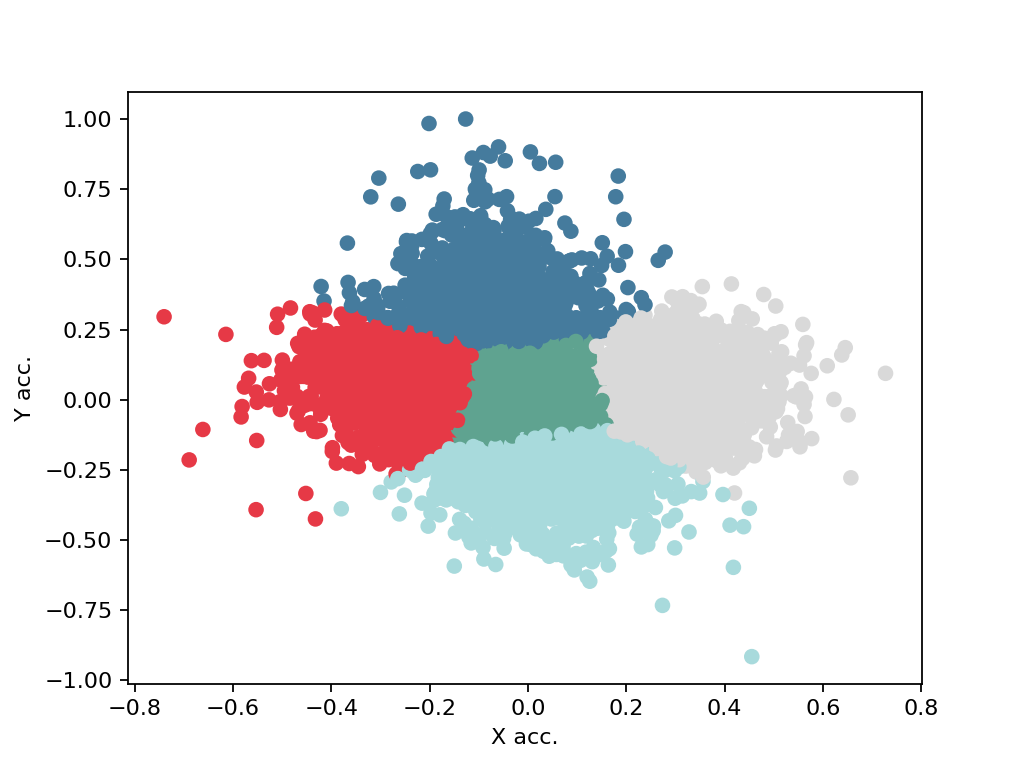

<IPython.core.display.Javascript object>


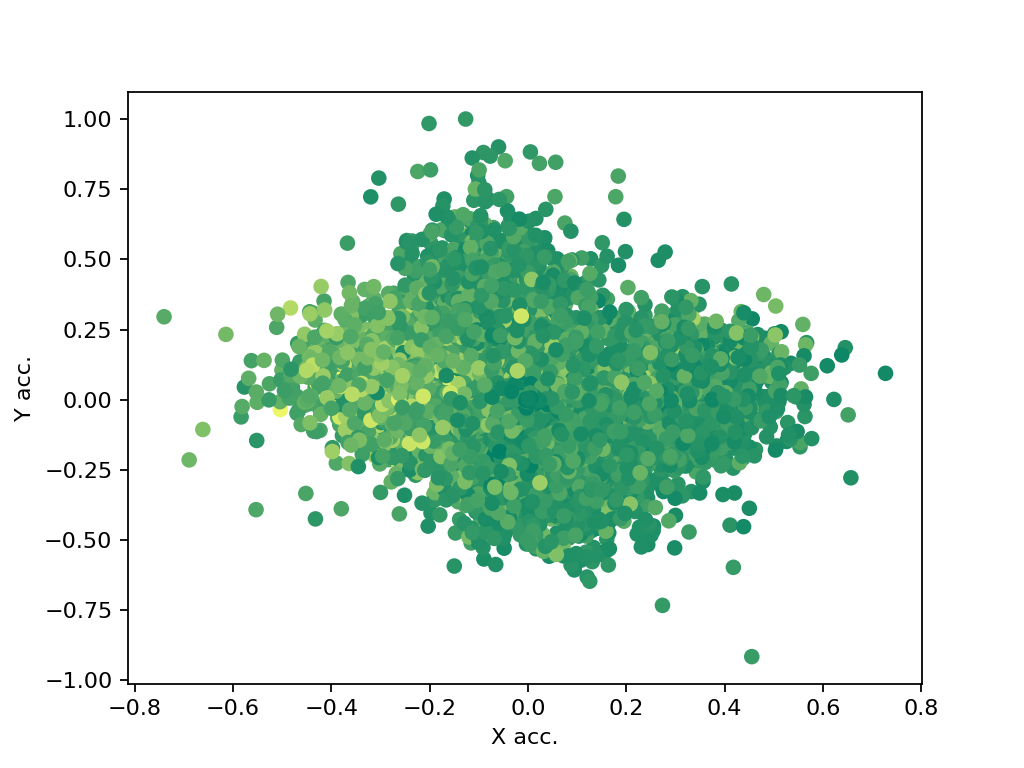

Text(0, 0.5, 'Y acc.')

In [27]:
# Plot data with predicted labels
fig1 = plt.figure(plt_counter)
plt_counter += 1
ax1 = plt.axes()
ax1.scatter(X_tr[:, 0], X_tr[:, 1], c=cmap(Y_tr_k_means))
ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')

fig2 = plt.figure(plt_counter)
plt_counter += 1
ax2 = plt.axes()
ax2.scatter(X_tr[:, 0], X_tr[:, 1], c=raw_data[:, 4], cmap='summer')
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')